<a href="https://colab.research.google.com/github/paramate-p/selected-topic-cmu/blob/main/Lecture03/workshop/Workshop_basic_repres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Dataset

In [1]:
!pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 84.0MB/s]


In [7]:
import pandas as pd
import zipfile

# Unzip the dataset
zip_path = './sms-spam-collection-dataset.zip'
extract_path = '.'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Import Data

In [12]:
# Detect the Encoding
import chardet

with open("./spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}


In [24]:
df = pd.read_csv("./spam.csv", encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df = df.rename({"v1":"label","v2":"text"}, axis=1)
df = df[["label","text"]]
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Text Processing

In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [83]:
def clean_text(text):
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove anything that is not English
  text = re.sub(r'\s+', ' ', text)  # Remove white space, and replace multi-white space with single space
  text = text.lower() # Lowering

  return text.strip()

def stop_words(text, common_words=None):
  stop_words = set(stopwords.words('english'))

  if common_words:
    stop_words.update(common_words)

  words = word_tokenize(text)
  words = [word for word in words if word not in stop_words]
  text = ' '.join(words)
  return text

In [30]:
df['text2'] = df['text'].apply(clean_text)
df['text2'] = df['text2'].apply(stop_words)
df.head()

,label,text,text2
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [31]:
# Calculate word length and added with column name “length”
df['length'] = df['text2'].apply(lambda x: len(x.split()))
df.head()

,label,text,text2,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,7


In [34]:
# Label Encoding
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [35]:
df.head()

,label,text,text2,length,label_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,7,0


In [45]:
max(df.length), min(df.length), df.length.mean()

(77, 0, 8.979720028715004)

In [46]:
df[df['length']==0]

,label,text,text2,length,label_encoded
252,ham,What you doing?how are you?,,0,0
959,ham,Where @,,0,0
1611,ham,645,,0,0
2805,ham,Can a not?,,0,0
3374,ham,:),,0,0
4115,ham,What you doing?how are you?,,0,0
4573,ham,:( but your not here....,,0,0
4822,ham,:-) :-),,0,0


In [52]:
# Feature encoding
# Remove rows with no words
df = df[df['text2'].str.strip() != ""]

vectorizer = CountVectorizer(max_features=1000)
bow_matrix = vectorizer.fit_transform(df['text2'])

In [53]:
bow_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,abiola,able,abt,ac,accept,access,account,across,actually,address,...,year,years,yep,yes,yesterday,yet,yo,yr,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df = df.reset_index(drop=True)
df_concat = pd.concat([df, bow_df], axis=1)
df_concat

,label,text,text2,length,label_encoded,abiola,able,abt,ac,accept,...,year,years,yep,yes,yesterday,yet,yo,yr,yrs,yup
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...,17,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5560,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5561,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5562,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# List Top 5 and bottom 5 of transform sample

In [59]:
# top 5
df_concat.head()

,label,text,text2,length,label_encoded,abiola,able,abt,ac,accept,...,year,years,yep,yes,yesterday,yet,yo,yr,yrs,yup
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# bottom 5
df_concat.tail()

,label,text,text2,length,label_encoded,abiola,able,abt,ac,accept,...,year,years,yep,yes,yesterday,yet,yo,yr,yrs,yup
5559,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...,17,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5560,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5561,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5562,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5563,ham,Rofl. Its true to its name,rofl true name,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling (Optional)
- KNN

<Axes: xlabel='label'>

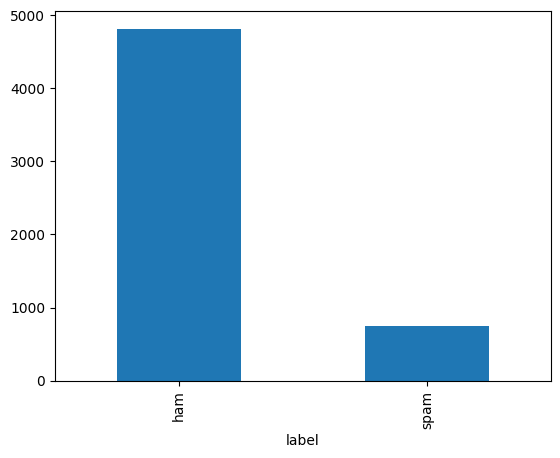

In [67]:
# plot label columns
df.label.value_counts().plot(kind='bar')

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(df, text_column, label_column, label_values, figsize=(20, 10), titles=None):
    """
    Generate and display side-by-side word clouds for different labels.

    Parameters:
    - df: DataFrame containing the data.
    - text_column: Name of the column containing text data.
    - label_column: Name of the column containing labels.
    - label_values: List of label values to generate word clouds for.
    - figsize: Tuple specifying the figure size (default is (20, 10)).
    - titles: List of titles for the word clouds (default is the label values).
    """
    if titles is None:
        titles = label_values

    fig, axes = plt.subplots(1, len(label_values), figsize=figsize)

    for i, label in enumerate(label_values):
        words = ' '.join(df[df[label_column] == label][text_column])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(titles[i], fontsize=30)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

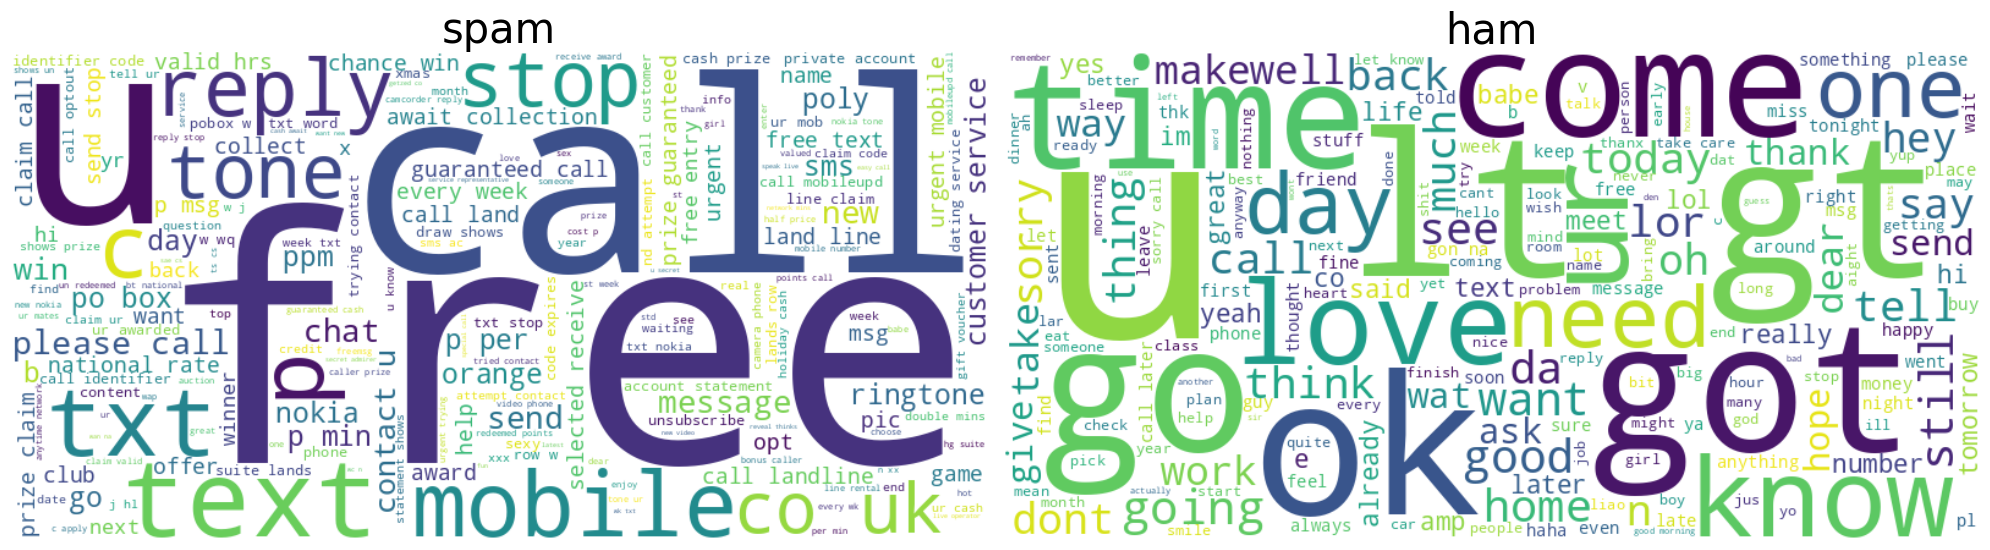

In [78]:
plot_wordclouds(df, 'text2', 'label', ["spam","ham"], figsize=(20, 10), titles=None)

In [79]:
# create dict of frequency words for each class
spam_words_dict = {}
ham_words_dict = {}

spam_words = ' '.join(df[df['label'] == 'spam']['text2'])
ham_words = ' '.join(df[df['label'] == 'ham']['text2'])

for word in spam_words.split():
    spam_words_dict[word] = spam_words_dict.get(word, 0) + 1

for word in ham_words.split():
    ham_words_dict[word] = ham_words_dict.get(word, 0) + 1


In [80]:
# show top 10 of ham class
sorted(ham_words_dict.items(), key=lambda x: x[1], reverse=True)[:10]

[('u', 1026),
 ('gt', 318),
 ('lt', 316),
 ('get', 311),
 ('ok', 287),
 ('go', 253),
 ('got', 245),
 ('ur', 241),
 ('know', 236),
 ('call', 236)]

In [81]:
# show top 10 of spam class
sorted(spam_words_dict.items(), key=lambda x: x[1], reverse=True)[:10]

[('call', 370),
 ('free', 228),
 ('u', 186),
 ('p', 180),
 ('txt', 170),
 ('ur', 144),
 ('mobile', 129),
 ('text', 126),
 ('stop', 126),
 ('claim', 113)]

In [86]:
# create common words list and add to stopwords

common_words = ["u", "gt", "lt", "p", "ur"]
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: stop_words(x, common_words=common_words))

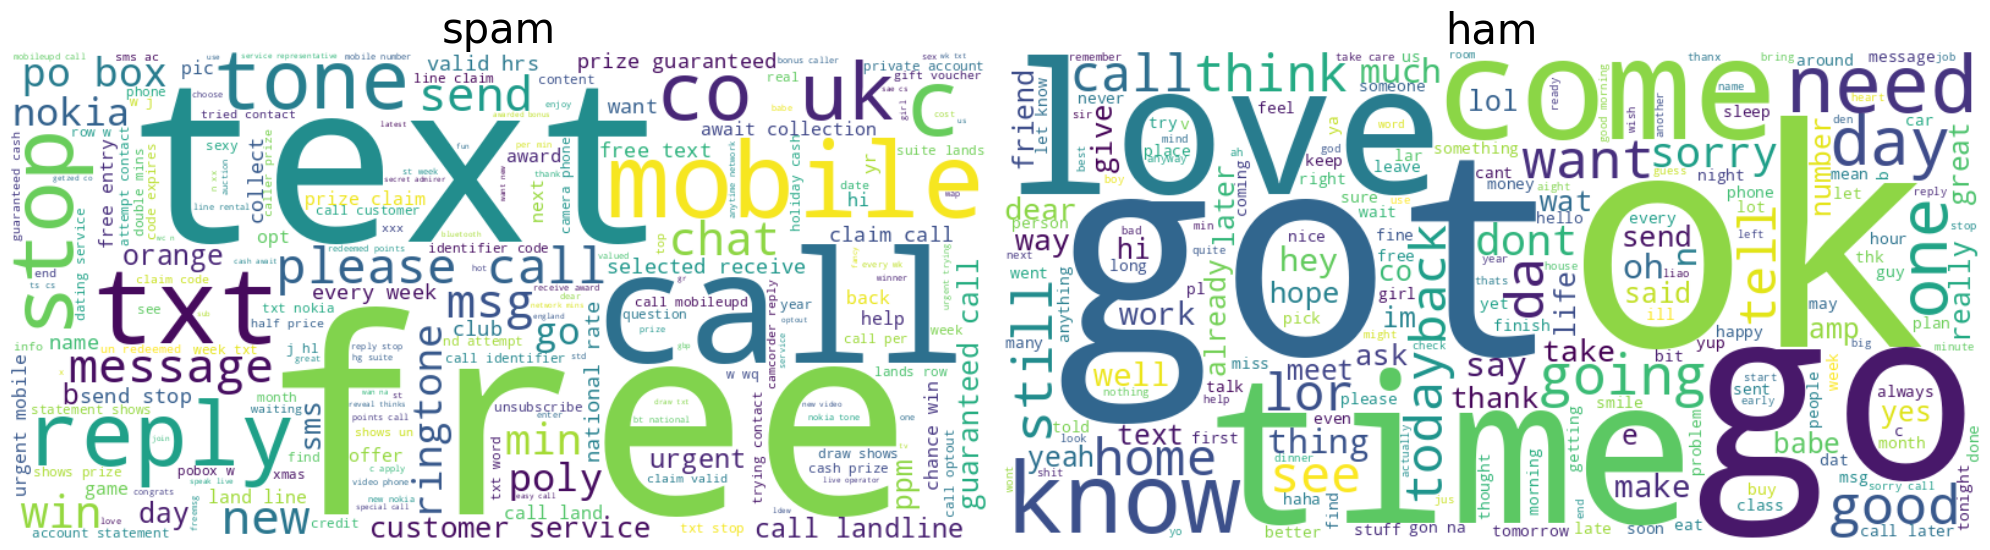

In [87]:
plot_wordclouds(df, 'cleaned_text', 'label', ["spam","ham"], figsize=(20, 10), titles=None)

In [88]:
# extract feature
df = df[df['cleaned_text'].str.strip() != ""]

vectorizer = CountVectorizer(max_features=1000)
bow_matrix = vectorizer.fit_transform(df['cleaned_text'])

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

X = bow_matrix.toarray()
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4448, 1000), (4448,), (1113, 1000), (1113,))

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       1.00      0.64      0.78       148

    accuracy                           0.95      1113
   macro avg       0.97      0.82      0.87      1113
weighted avg       0.95      0.95      0.95      1113

Accuracy Score: 0.9514824797843666


## Hyper parameter tuning

In [92]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Parameters: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'euclidean'}
Best Cross-Validation Accuracy: 0.9491927553999571


In [93]:
best_params = random_search.best_params_

best_knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)

# Train the model with the training data
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the performance on the test set
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.98      0.77      0.86       148

    accuracy                           0.97      1113
   macro avg       0.97      0.88      0.92      1113
weighted avg       0.97      0.97      0.97      1113

Test Accuracy: 0.967654986522911


### Conclusion
**After Hyperparameter Tuning the accuracy is improved from 95% to 97% on testset**